In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_test = x_test / 255
x_train = x_train / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
y_train.shape

(60000, 10)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2022-09-25 19:38:49.019717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-25 19:38:49.019853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [7]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12


2022-09-25 19:38:49.344684: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-25 19:38:49.633004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


370/375 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8845

2022-09-25 19:38:52.696758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 9ms/step - loss: 0.4000 - accuracy: 0.8846 - val_loss: 0.3049 - val_accuracy: 0.9118
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3079 - accuracy: 0.9122 - val_loss: 0.2817 - val_accuracy: 0.9229
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2950 - accuracy: 0.9172 - val_loss: 0.2921 - val_accuracy: 0.9209
Epoch 4/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2873 - accuracy: 0.9203 - val_loss: 0.2978 - val_accuracy: 0.9156
Epoch 5/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2824 - accuracy: 0.9224 - val_loss: 0.2990 - val_accuracy: 0.9187
Epoch 6/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2782 - accuracy: 0.9229 - val_loss: 0.2745 - val_accuracy: 0.9274
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2740 - accuracy: 0.9241 - val_loss: 0.2801 - val_accuracy: 0.9215
Epoch 8/12
375/37

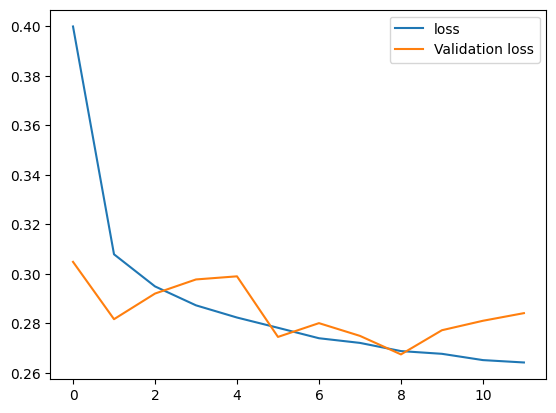

In [8]:
history.epoch
# plot loss and accuracy for training set
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.legend()

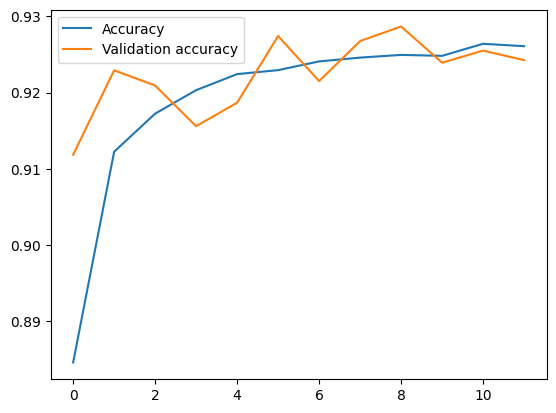

In [9]:
plt.plot(history.epoch, history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [11]:
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.2846818268299103
Test accuracy: 0.9176000356674194


In [12]:
modelRelu = keras.Sequential()
modelRelu.add(keras.layers.Dense(256, activation='relu', input_shape=(784,)))
modelRelu.add(keras.layers.Dense(10, activation='softmax'))
modelRelu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
modelRelu.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history = modelRelu.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
  4/375 [..............................] - ETA: 7s - loss: 1.8621 - accuracy: 0.4316  

2022-09-25 19:39:30.142608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


371/375 [============================>.] - ETA: 0s - loss: 0.3219 - accuracy: 0.9089

2022-09-25 19:39:32.964980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 9ms/step - loss: 0.3207 - accuracy: 0.9094 - val_loss: 0.1682 - val_accuracy: 0.9530
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.1417 - accuracy: 0.9591 - val_loss: 0.1256 - val_accuracy: 0.9631
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0970 - accuracy: 0.9714 - val_loss: 0.1077 - val_accuracy: 0.9684
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0733 - accuracy: 0.9785 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0562 - accuracy: 0.9840 - val_loss: 0.0903 - val_accuracy: 0.9746
Epoch 6/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0853 - val_accuracy: 0.9757
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.0913 - val_accuracy: 0.9730
Epoch 8/12
375/37

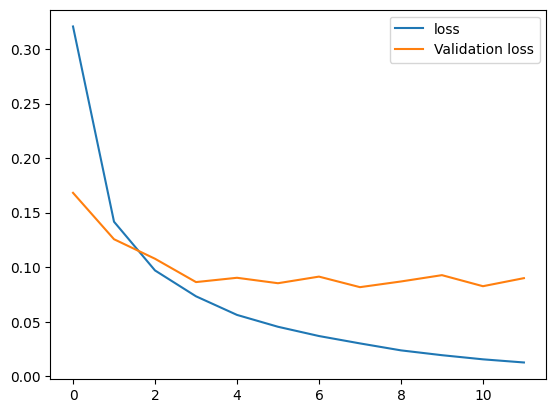

In [14]:
history.epoch
# plot loss and accuracy for training set
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
plt.legend()

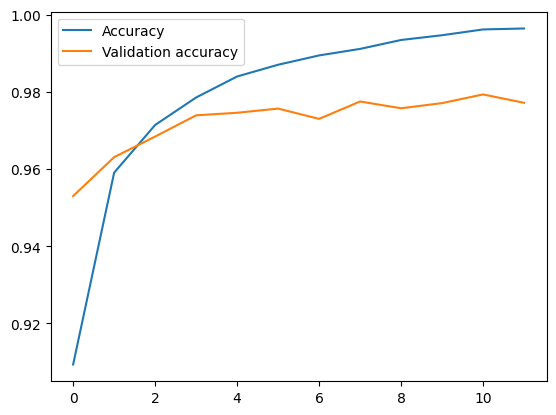

In [15]:
plt.plot(history.epoch, history.history['accuracy'], label='Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
plt.legend()